In [6]:
#Linear Regression:

import pandas as pd
from sklearn import linear_model

beer = pd.read_csv('../lager_antioxidant_reg.csv')
beer.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [20]:
x_columns = [col for col in beer.columns.values if col != "tpc"]
beer_x = beer[x_columns]
beer_y = beer["tpc"]

beer_model = linear_model.LinearRegression()
# create the model
beer_model.fit(beer_x, beer_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# now we print the model coefficients
beer_model.intercept_

18.830383913148154

In [8]:
beer_model.coef_

array([ 5.84731786e-02,  1.28827809e+00,  1.27650959e+02, -6.14737240e-01,
       -1.09375291e+00,  7.35403422e+01,  3.76892085e-01])

In [9]:
# score returns the coefficient of determination or r squared. 
# This number tells us what proportion of the variation in the data is explained by the model
beer_model.score(beer_x, beer_y)

0.8219280156188545

0.8219280156188545

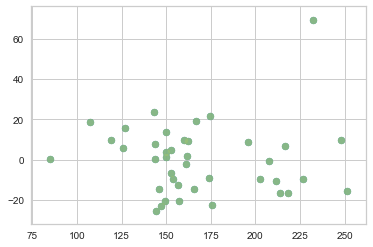

In [15]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(beer_model, hist=False)
visualizer.fit(beer_x, beer_y)  # Fit the training data to the model
visualizer.score(beer_x, beer_y)  

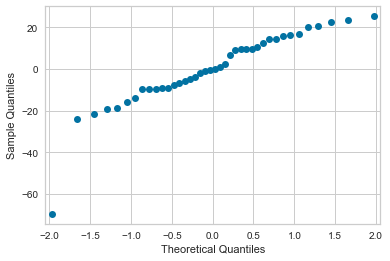

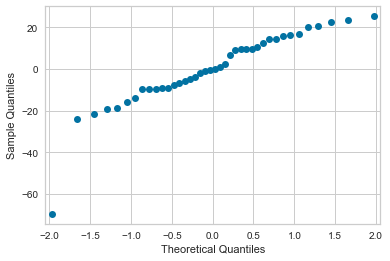

In [19]:
import statsmodels.api as sm

predictions = beer_model.predict(beer_x)
residuals = beer_y - predictions
sm.qqplot(residuals)

In [29]:
# Logistic Regression: 
titanic=pd.read_csv('../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
titanic_drop = titanic.isnull().sum(axis = 0)
titanic_drop

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
titanic_drop = titanic.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])

In [33]:
titanic_missing = titanic_drop.dropna()
titanic_missing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
titanic_with_dummies = pd.get_dummies(titanic_missing, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True) 
titanic_with_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [38]:
from sklearn.linear_model import LogisticRegression 
x_columns = [col for col in titanic_with_dummies.columns.values if col != "Survived"]
titanic_x = titanic_with_dummies[x_columns] 
titanic_y = titanic_with_dummies["Survived"] 
titanic_model = LogisticRegression() 
titanic_model.fit(titanic_x, titanic_y) 
titanic_model.score(titanic_x, titanic_y) 

/Users/laumaustupa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.797752808988764

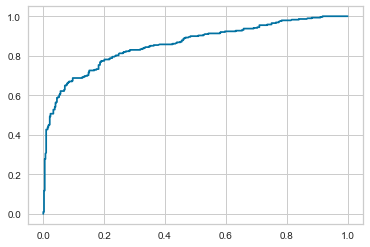

In [39]:
# ROC Curve:

from sklearn import metrics 
import matplotlib.pyplot as plt 
y_pred_proba = titanic_model.predict_proba(titanic_x)[::,1] 
fpr, tpr, _ = metrics.roc_curve(titanic_y, y_pred_proba) 
auc = metrics.roc_auc_score(titanic_y, y_pred_proba) 
plt.plot(fpr,tpr)

In [40]:
auc

0.8580319706498951